In [2]:

!pip install PeakUtils


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from scipy.signal import find_peaks
import pywt
import plotly.offline as pyoff
from plotly.offline import iplot

import plotly.graph_objs as go
import plotly.tools as tools
import plotly.figure_factory as ff
import peakutils
import scipy

In [76]:
breath = pd.read_excel('AH.xlsx')

In [77]:
breath.head(10)

,Date,CH4 ppm,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,2024-01-28 00:00:00,33.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-01-28 00:00:01,33.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-01-28 00:00:02,29.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-01-28 00:00:03,29.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-01-28 00:00:04,26.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2024-01-28 00:00:05,26.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2024-01-28 00:00:06,24.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2024-01-28 00:00:07,24.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2024-01-28 00:00:08,22.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-01-28 00:00:09,22.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df2 = breath.rename(columns={"CH4 ppm": "CH4"})


In [79]:
df99 = df2[1:1000]

In [80]:
import plotly.express as px

fig = go.Figure([go.Scatter(x=df99['Date'], y=df99['CH4'])])
fig.show()

Text(0, 0.5, 'CH4 ppm')

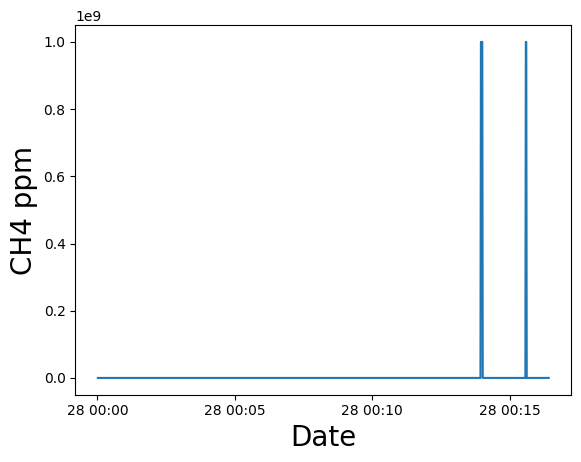

In [81]:
y = np.array(df99.CH4)
x = df99.index
date_array = pd.to_datetime(df99.Date)
plt.plot(date_array,y)
plt.xlabel('Date',fontsize=20)
plt.ylabel('CH4 ppm',fontsize=20)


Text(0, 0.5, 'CH4 ppm')

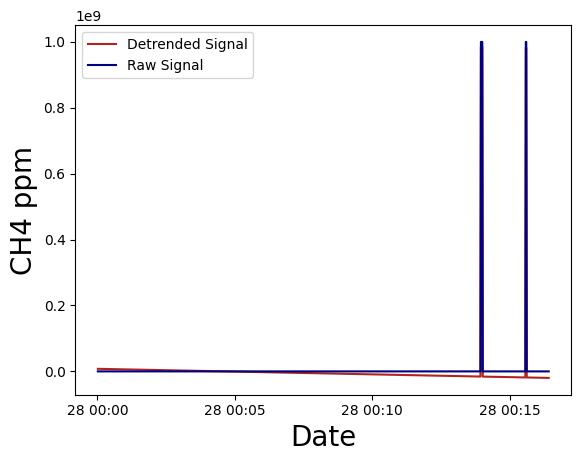

In [82]:
y_detrend = signal.detrend(y)
plt.plot(date_array, y_detrend,color='firebrick',label='Detrended Signal')
plt.plot(date_array,y, color='navy',label='Raw Signal')
plt.legend()
plt.xlabel('Date',fontsize=20)
plt.ylabel('CH4 ppm',fontsize=20)

(0.0, 200.0)

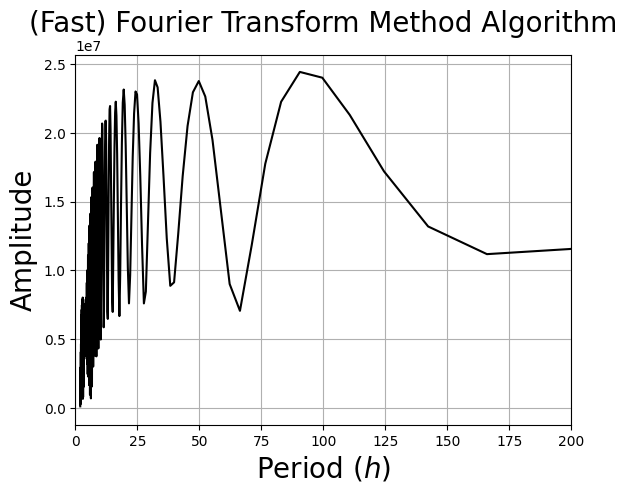

In [83]:
FFT =np.fft.fft(y_detrend)
new_N=int(len(FFT)/2)
f_nat=1
new_X = np.linspace(10**-12, f_nat/2, new_N, endpoint=True)
new_Xph=1.0/(new_X)
FFT_abs=np.abs(FFT)
plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='black')
plt.xlabel('Period ($h$)',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.title('(Fast) Fourier Transform Method Algorithm',fontsize=20)
plt.grid(True)
plt.xlim(0,200)

In [84]:
fft_abs = 2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph)
fft_abs = pd.DataFrame(fft_abs, columns = ['Amplitude'])
fft_sorted = fft_abs.sort_values(by='Amplitude',ascending=False).head(20)
fft_sorted

,Amplitude
11,2.442623e+07
10,2.400707e+07
31,2.382255e+07
20,2.376252e+07
30,2.330313e+07
51,2.314652e+07
41,2.300547e+07
21,2.294463e+07
40,2.278929e+07
19,2.263680e+07


In [85]:
fft_sorted.index/24


Float64Index([0.4583333333333333, 0.4166666666666667, 1.2916666666666667,
              0.8333333333333334,               1.25,              2.125,
              1.7083333333333333,              0.875, 1.6666666666666667,
              0.7916666666666666, 2.5416666666666665,                0.5,
              2.1666666666666665, 1.3333333333333333, 2.0833333333333335,
              2.9583333333333335,                3.0, 2.5833333333333335,
                            1.75,              0.375],
             dtype='float64')

In [86]:
#Defining the filtering function
def fft_filter(th):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

In [87]:
#Showing the plots at different thresholds values
#Defining the amplitude filtering function
def fft_filter_amp(th):
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

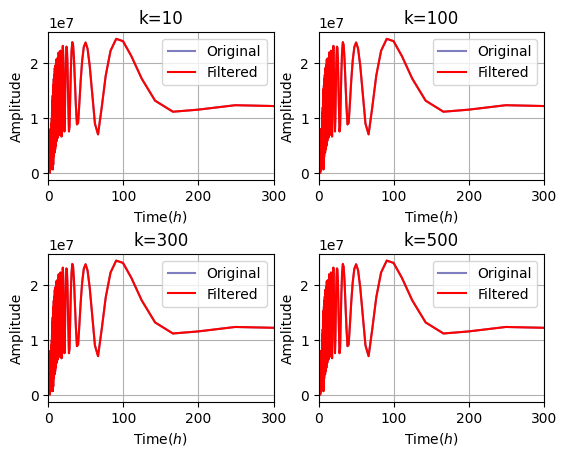

In [88]:
K_plot=[10,100,300,500]
j=0
for k in K_plot:
    j=j+1
    plt.subplot(2,2,j)
    plt.title('k=%i'%(k))
    plt.xlim(0,300)
    plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='navy',alpha=0.5,label='Original')
    plt.grid(True)
    plt.plot(new_Xph,fft_filter_amp(k),'red',label='Filtered')
    plt.xlabel('Time($h$)')
    plt.ylabel('Amplitude')
    plt.legend()
plt.subplots_adjust(hspace=0.5)

In [89]:
def fft_filter(perc):
    th=perc*(2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph)).max()
    fft_tof=FFT.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

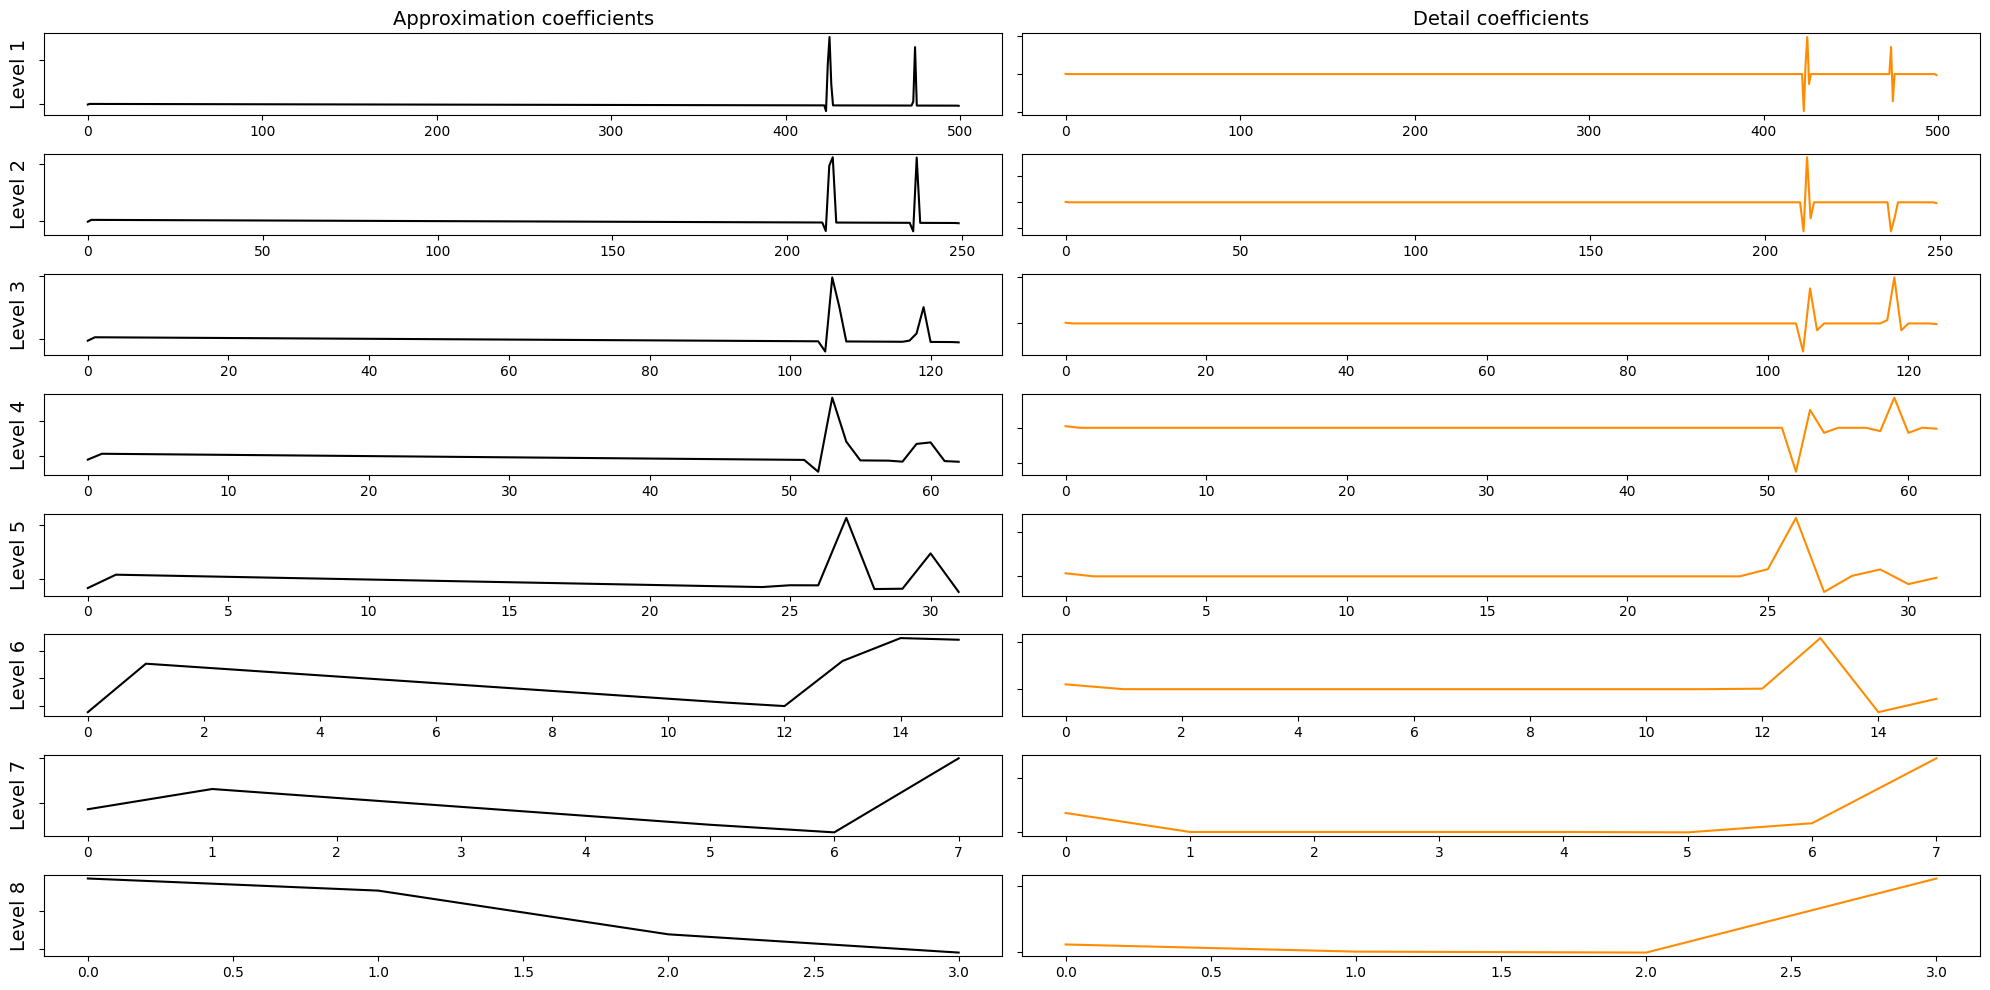

In [90]:
time=x.max()
sample_rate=1/900.
size= int(sample_rate*time)
t = np.linspace(0, time, num=size)
dataset = y_detrend
waveletname = 'sym2'
levels=8
fig, axarr = plt.subplots(nrows=levels, ncols=2, figsize=(20,10))
COEFF_D=[]
DATASET=[]
k=1
for ii in range(levels):
    (dataset, coeff_d) = pywt.dwt(dataset, waveletname,mode='per')
    axarr[ii, 0].plot(dataset, 'black')
    axarr[ii, 1].plot(coeff_d, 'darkorange')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
    #print(len(coeff_d))
    COEFF_D.append(np.repeat(coeff_d,2**k))
    DATASET.append(np.repeat(dataset,2**k))
    k=k+1
plt.tight_layout()
plt.show()

In [ ]:
#Installing plotly
!pip install plotly==2.0.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.0/824.0 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for plotly: filename=plotly-2.0.1-py3-none-any.whl size=858104 sha256=2c32bcfca7816b1858b528db85e6e26afeea67d19bcbd26e6c4980606b37ea8b
  Stored in directory: /root/.cache/pip/wheels/10/15/8e/a55802110a4ff119558daab78240cb631989ff57be988a536a
Successfully built plotly
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cufflinks 0.17.3 requires plotly>=4.1.1, but you have plotly 2.0.1 which is incompatible.


In [ ]:
#Background Subtraction

import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tools
import plotly.figure_factory as ff

import numpy as np
import pandas as pd
import scipy
import peakutils

In [ ]:
nh3 = pd.read_excel('nh3bg.xlsx')

In [ ]:
nh3.head(10)

,Td,NH3
2,2020-11-13 10:11:51.036000,2967.5886
3,2020-11-13 10:11:53.701000,6410.5781
4,2020-11-13 10:11:56.767000,5767.1919
5,2020-11-13 10:11:59.752000,5852.3682
6,2020-11-13 10:12:02.752000,6028.2261
7,2020-11-13 10:12:05.752000,5910.2944
8,2020-11-13 10:12:08.752000,5890.5952
9,2020-11-13 10:12:11.752000,5860.2988
10,2020-11-13 10:12:14.752000,5820.0356
11,2020-11-13 10:12:17.752000,6118.3384


In [ ]:
nh3 = nh3.iloc[1: , :]


In [ ]:
nh3.rename(columns = {'Unnamed: 0':'Td', 'Unnamed: 1':'NH3'}, inplace = True)


In [ ]:
time_series = nh3['NH3']
time_series = np.asarray(time_series)

matt = nh3[0:1500]

table = ff.create_table(matt)

In [ ]:
iplot(table, filename='breath-dataframe')
